## Recap with Keras Library 
### Application: Function approximation (Regression) && Non Linear Classification with Keras Library 
#### Learning And Validattion Curve

### 1: Function approximation (Regression) with Keras

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(123)

2022-12-03 19:51:13.142643: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 19:51:13.142691: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 19:51:14.319443: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-03 19:51:14.319551: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-03 19:51:14.319564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

### Dataset

In [2]:
# Set the random seed for reproducible results
np.random.seed(42)

# "True" generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

(90,)
(30,)


In [4]:
x_train

array([0.03142919, 0.04645041, 0.14092422, 0.24929223, 0.51423444,
       0.31435598, 0.72960618, 0.9093204 , 0.62329813, 0.63755747,
       0.18485446, 0.96958463, 0.35675333, 0.87146059, 0.27134903,
       0.4937956 , 0.18182497, 0.92187424, 0.02541913, 0.18657006,
       0.81546143, 0.89482735, 0.28975145, 0.63641041, 0.52006802,
       0.73199394, 0.31171108, 0.66252228, 0.86617615, 0.32533033,
       0.92969765, 0.98688694, 0.22879817, 0.70685734, 0.52475643,
       0.59789998, 0.00552212, 0.07455064, 0.06355835, 0.15601864,
       0.82873751, 0.68423303, 0.80812038, 0.61185289, 0.83244264,
       0.11586906, 0.12203823, 0.19598286, 0.07697991, 0.96990985,
       0.78517596, 0.29122914, 0.41038292, 0.32518332, 0.04522729,
       0.53934224, 0.03438852, 0.76078505, 0.37454012, 0.05808361,
       0.47221493, 0.38867729, 0.93949894, 0.54671028, 0.30424224,
       0.36636184, 0.33089802, 0.88721274, 0.80839735, 0.86310343,
       0.15599452, 0.49517691, 0.892559  , 0.44015249, 0.17052

In [5]:
y

array([-0.04938892,  0.04475764,  0.05647044, -0.02814329,  0.15889086,
        0.19578347,  0.17473167,  0.19376568,  0.09578607,  0.20072338,
        0.24125928,  0.19713621,  0.27002241,  0.36786014,  0.54856942,
        0.41307619,  0.44881168,  0.42829488,  0.25213667,  0.49932245,
        0.51265328,  0.80109337,  0.53560871,  0.60120932,  0.59601645,
        0.51616445,  0.751913  ,  0.71702529,  0.72588143,  0.5824906 ,
        0.82128903,  0.54346499,  0.77638978,  0.97854857,  0.70839214,
        0.77139608,  0.8636195 ,  0.82156667,  0.73263909,  0.89711278,
        0.78559277,  0.95887973,  0.82015318,  1.07666834,  0.84441195,
        0.89432834,  1.02246637,  0.81821544,  0.97092542,  1.10531437,
        0.8152772 ,  1.00053466,  1.01340392,  1.07262048,  0.87602435,
        0.86711415,  1.05053585,  1.02578141,  1.01403645,  1.01279814,
        0.89002116,  0.97974311,  0.96988453,  0.86167765,  1.11155724,
        0.96849879,  0.79898856,  0.96060589,  0.7917698 ,  0.96

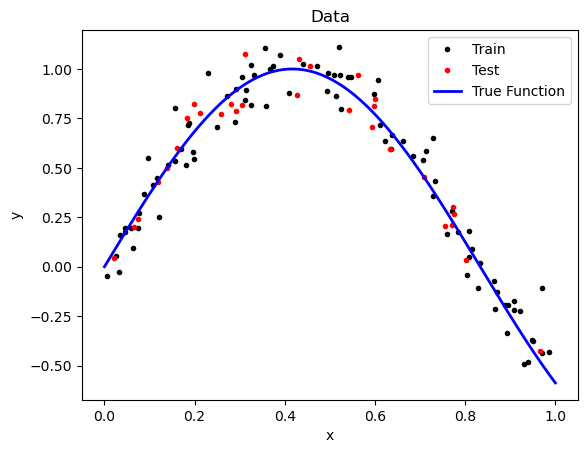

In [6]:
# Visualize observations and true curve
plt.plot(x_train, y_train, 'k.', label = 'Train'); 
plt.plot(x_test, y_test, 'r.', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

In [7]:
def plot_model_function(model):
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))

    # Model curve
    model_curve = model.predict(x_curve)

    # True curve
    y_true_curve = true_gen(x_curve[:, 0])

    # Plot observations, true function, and model predicted function

    plt.plot(x_train, y_train, 'k.', label = 'Observations')
    plt.plot(x_curve, y_true_curve, linewidth = 3, label = 'True Function')
    plt.plot(x_curve, model_curve, linewidth = 3, label = 'Model Function')
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend()
    plt.ylim(-1, 1.5); plt.xlim(0, 1)

    plt.show()

### Build Regression Model with Keras

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

model.fit(x_train, y_train,
          epochs=1000,
          batch_size=128, verbose=True)

2022-12-03 19:52:30.237452: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-03 19:52:30.237983: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 19:52:30.238011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ibra-kdbra): /proc/driver/nvidia/version does not exist


Epoch 1/1000
1/1 [==============================] - 1s 877ms/step - loss: 0.4048 - mean_squared_error: 0.4048
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4038 - mean_squared_error: 0.4038
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4028 - mean_squared_error: 0.4028
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4018 - mean_squared_error: 0.4018
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4008 - mean_squared_error: 0.4008
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3998 - mean_squared_error: 0.3998
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3988 - mean_squared_error: 0.3988
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3978 - mean_squared_error: 0.3978
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3969 - mean_squared_error: 0.3969
Epoch 10/1000
1/1 [=======

In [27]:
score = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 297ms/step - loss: 0.0080 - mean_squared_error: 0.0080


4/4 [==============================] - 0s 5ms/step


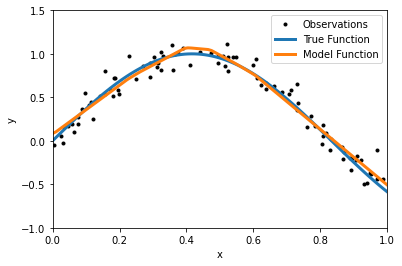

In [28]:
plot_model_function(model)

### 2: Non Linear Classification with Keras

In [8]:
from utils import load_dataset, plot_decision_boundary

### Load the dataset

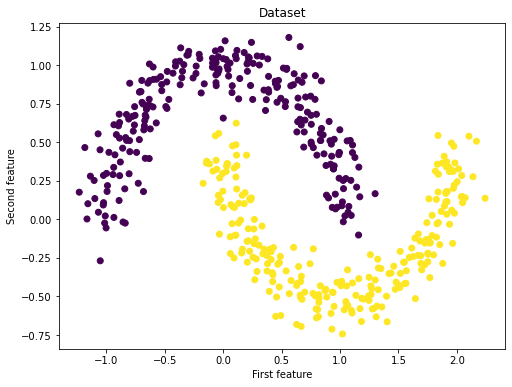

In [9]:
X,y =  load_dataset()

### Split the dataset to train and test sets

In [ ]:
?

In [11]:
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c='r',marker='+')
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### Build and train a Mutilayer neural network to classify the data

In [12]:
?

### Learning and validation curves

In [12]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Model Evaluation

In [13]:
tr_eval_res = model.evaluate(X_train,y_train,verbose=0)
eval_res= model.evaluate(X_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

### Decision Boundary

In [14]:
plot_decision_boundary(model,X,y)